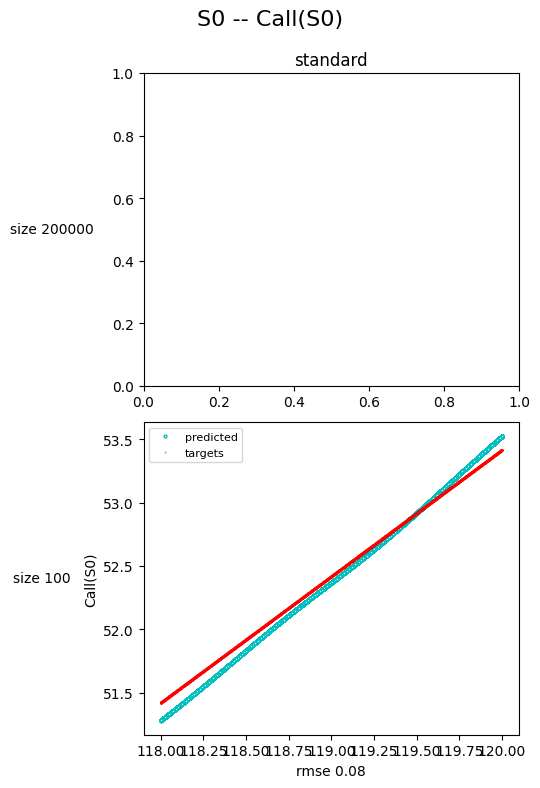

In [15]:
### Copy of Main.py as a juypter notebook to visualize results

###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd(),'..', '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())

###
### 1. Training data
###
#from CDF import *
generator = GBM(GBM_Case.ClosedSolutionAddtiveNoise,noiseVariance = 30.0)
sizes = [200000,100] # [sizePerTrainingStep, trainingSteps]
nTest = 2000 # Test set size
dataSeed = 1
weightSeed = 1

###
### 2. Set Nueral network structure / Hyperparameters
### 

hiddenNeurons = 50                     # we use equal neurons for each hidden layer
hiddenLayers = 2                      # amount of hidden layers
activationFunctionsHidden = tf.nn.sigmoid  # activation functions of hidden layers
learning_rate_schedule=[
    (0.0, 0.001), 
    (0.333, 0.0001),
    (0.666, 0.0001)
    ] 
activationFunctionOutput = tf.nn.sigmoid
batches_per_epoch = 1          # (min for TrainingMethod.GenerateDataDuringTraining is 1)
###
### 3. Train network
###

trainingMethod = TrainingMethod.GenerateDataDuringTraining
xTest, yTest, yPredicted = train_and_test(generator, sizes, nTest, dataSeed, None, weightSeed, hiddenNeurons, hiddenLayers, activationFunctionsHidden, trainingMethod = trainingMethod, batches_per_epoch = batches_per_epoch,learning_rate_schedule=learning_rate_schedule,activationFunctionOutput=activationFunctionOutput)
    
###
### 3. Study results
###   

# show predicitions
plot_results("S0", yPredicted, xTest, "x", "Call(S0)", yTest, sizes, True, False, None, trainingMethod)